In [ ]:
#EDA Anberd and Patent

In [2]:
#loading packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from sklearn import preprocessing
from statsmodels.tsa.stattools import adfuller

In [3]:
#loading Pat dataset from worldbank
dfPat = pd.read_csv('PAT.csv')
dfPat.head()

,KINDPATENT,Patents Office & Patents Families,KINDCOUNTRY,Reference country,LOCATION,Country,IPC,Technology domains & IPC,KINDDATE,Reference Date,...,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,FRA,France,TOTAL,Total Patents,PRIORITY,Priority date,...,1999,NBR,Number,0,Units,NaN,NaN,7216.0872,NaN,NaN
1,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,FRA,France,TOTAL,Total Patents,PRIORITY,Priority date,...,2000,NBR,Number,0,Units,NaN,NaN,7305.6126,NaN,NaN
2,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,FRA,France,TOTAL,Total Patents,PRIORITY,Priority date,...,2001,NBR,Number,0,Units,NaN,NaN,7325.8377,NaN,NaN
3,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,FRA,France,TOTAL,Total Patents,PRIORITY,Priority date,...,2002,NBR,Number,0,Units,NaN,NaN,7461.2570,NaN,NaN
4,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,FRA,France,TOTAL,Total Patents,PRIORITY,Priority date,...,2003,NBR,Number,0,Units,NaN,NaN,7969.9370,NaN,NaN


In [4]:
#cleaning
dfPat2 =  dfPat.loc[dfPat["KINDPATENT"].isin(["IP5"])]
dfPat3 =  dfPat2.loc[dfPat2["KINDCOUNTRY"].isin(["INVENTORS"])]
dfPat4 = dfPat3[["Country", "Technology domains & IPC", "Time", "Value"]]
dfPat5 = dfPat4.rename(columns={"Technology domains & IPC": "Domain"})
dfPatT = dfPat5[dfPat5["Domain"]=="Total Patents"]
dfPatT = dfPatT[["Country","Time", "Value"]]

In [134]:
dfPat5['Country'].unique()

array(['France', 'Germany', 'Italy', 'Japan', 'Korea', 'United Kingdom',
       'United States', "China (People's Republic of)"], dtype=object)

In [59]:
df2RD['Industry'].unique()

array(['Total business enterprise', 'Agriculture, forestry and fishing',
       'Mining and quarrying', 'Manufacturing',
       'Food products, beverages and tobacco',
       'Food products and beverages', 'Tobacco products',
       'Textiles, wearing apparel, leather and related products',
       'Textiles', 'Wearing apparel',
       'Leather and related products, footwear',
       'Wood, paper, printing and reproduction of recorded media',
       'Wood and of products of wood and cork, except furniture; articles of straw and plaiting materials',
       'Paper and paper products',
       'Printing and reproduction of recorded media',
       'Printing and service activities related to printing',
       'Reproduction of recorded media',
       'Chemical, rubber, plastics, fuel products and other non-metallic mineral products',
       'Coke and refined petroleum products',
       'Chemical and pharmaceutical products',
       'Chemicals and chemical products',
       'Pharmaceuticals, me

<AxesSubplot: xlabel='Domain'>

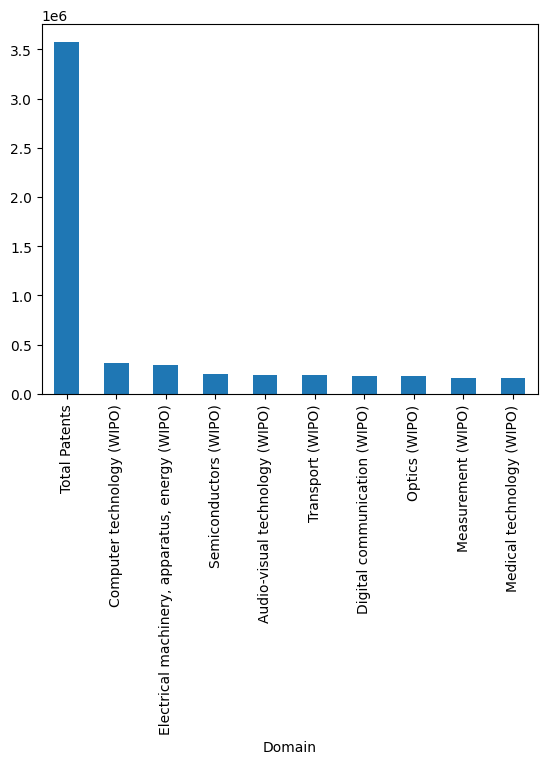

In [60]:
dfPat5.groupby('Domain')['Value'].sum().sort_values(ascending=0)[:10].plot.bar()

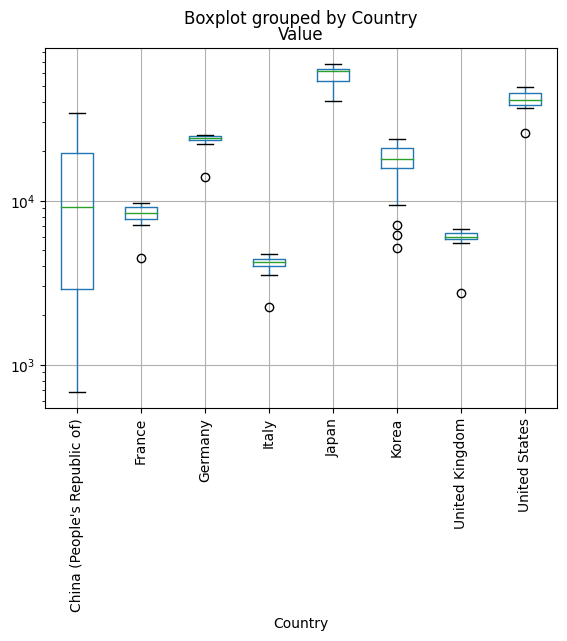

In [9]:
dfPatT.boxplot(column = "Value", by='Country')
plt.xticks(rotation=90)
plt.semilogy();

In [62]:
def pattrend(country:str, group:str, columnlist:list, sumby:str):
    df = dfPat5[(dfPat5.Country == country) ]
    df_line = df[columnlist].groupby(group).sum(sumby)
    df_line.plot(label = country)

France
Germany
Italy
Japan
Korea
United Kingdom
United States
China (People's Republic of)


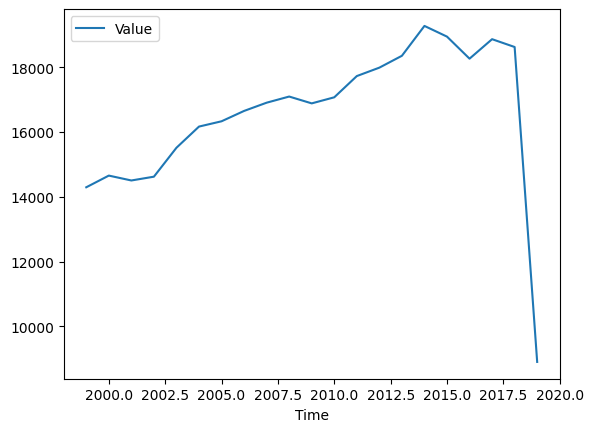

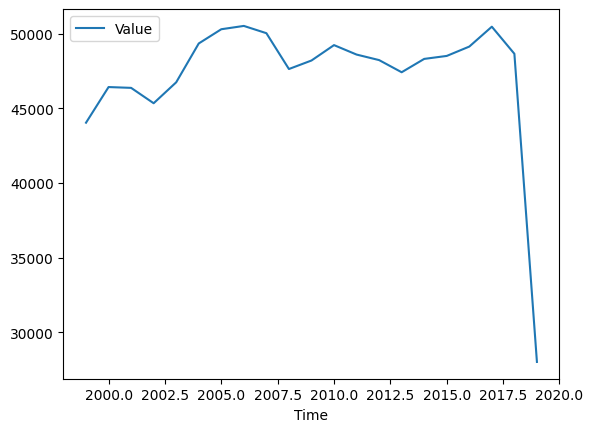

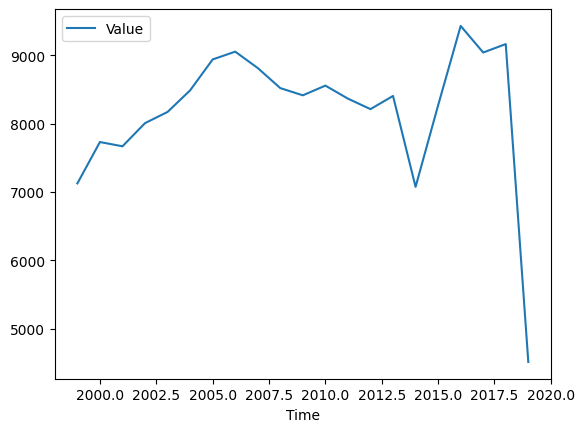

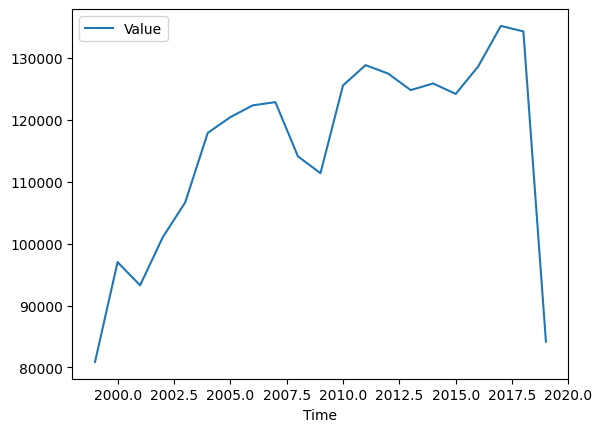

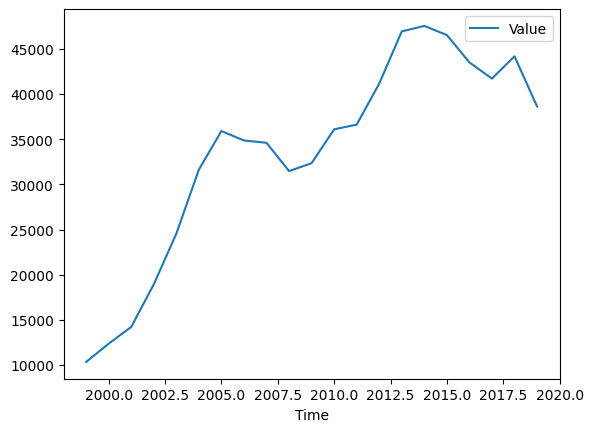

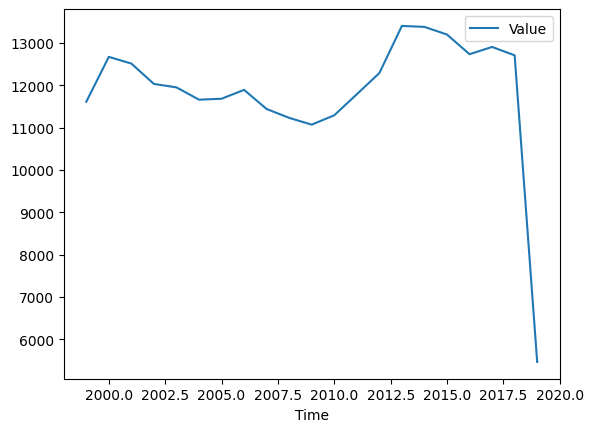

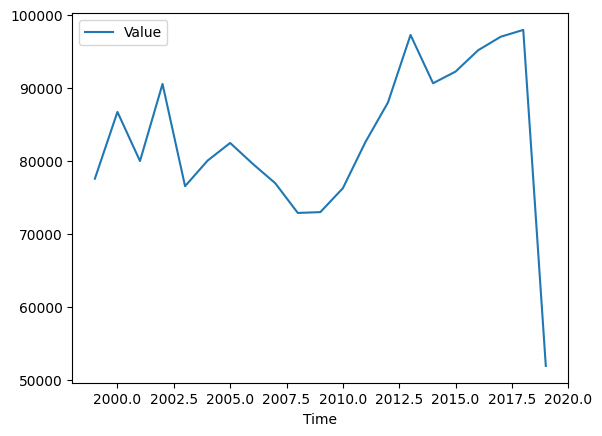

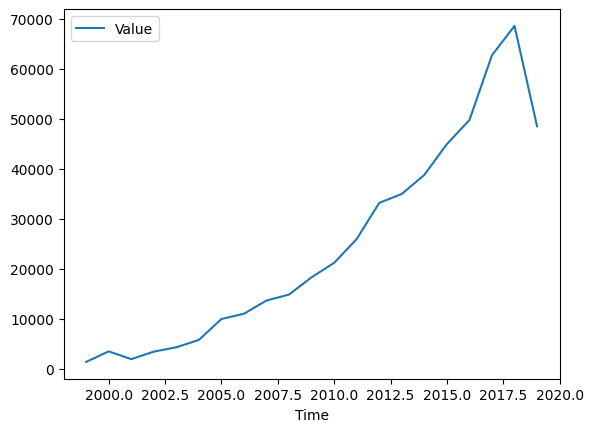

In [63]:
for i in dfPat5.Country.unique():
    pattrend(country=i, group="Time", columnlist=["Time","Value"], sumby="Value")
    print(i)

In [35]:
dfRD = pd.read_csv('ANBERD_3.csv')
dfRD.head()

,LOCATION,Country,CRITERIA,Classification criteria,CUR,Measure,IND,Industry,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,FRA,France,MA,Main activity,USDPPP,PPP dollars - current prices,DTOTAL,TOTAL BUSINESS ENTERPRISE,2007,2007,USD,US Dollar,0,Units,NaN,NaN,27850484039,NaN,NaN
1,FRA,France,MA,Main activity,USDPPP,PPP dollars - current prices,DTOTAL,TOTAL BUSINESS ENTERPRISE,2008,2008,USD,US Dollar,0,Units,NaN,NaN,29211879149,NaN,NaN
2,FRA,France,MA,Main activity,USDPPP,PPP dollars - current prices,DTOTAL,TOTAL BUSINESS ENTERPRISE,2009,2009,USD,US Dollar,0,Units,NaN,NaN,30622218219,NaN,NaN
3,FRA,France,MA,Main activity,USDPPP,PPP dollars - current prices,DTOTAL,TOTAL BUSINESS ENTERPRISE,2010,2010,USD,US Dollar,0,Units,NaN,NaN,32124446864,NaN,NaN
4,FRA,France,MA,Main activity,USDPPP,PPP dollars - current prices,DTOTAL,TOTAL BUSINESS ENTERPRISE,2011,2011,USD,US Dollar,0,Units,NaN,NaN,34290381593,NaN,NaN


In [36]:
df2RD = dfRD[["LOCATION", "Country", "Industry", "Time", "Value"]]
df2RD["Industry"] = df2RD['Industry'].str.capitalize()
df2RD.head()

C:\Users\lisar\AppData\Local\Temp\ipykernel_10364\507383258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2RD["Industry"] = df2RD['Industry'].str.capitalize()


,LOCATION,Country,Industry,Time,Value
0,FRA,France,Total business enterprise,2007,27850484039
1,FRA,France,Total business enterprise,2008,29211879149
2,FRA,France,Total business enterprise,2009,30622218219
3,FRA,France,Total business enterprise,2010,32124446864
4,FRA,France,Total business enterprise,2011,34290381593


<AxesSubplot: xlabel='Country'>

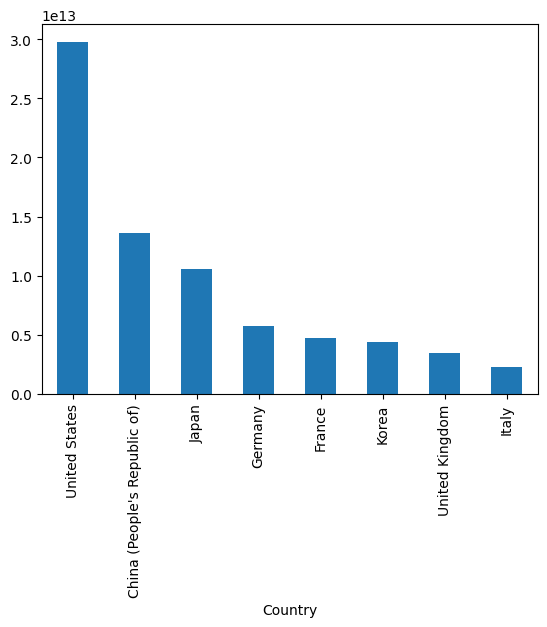

In [37]:
df2RD.groupby('Country')['Value'].sum().sort_values(ascending=0)[:10].plot.bar()

<AxesSubplot: xlabel='Time'>

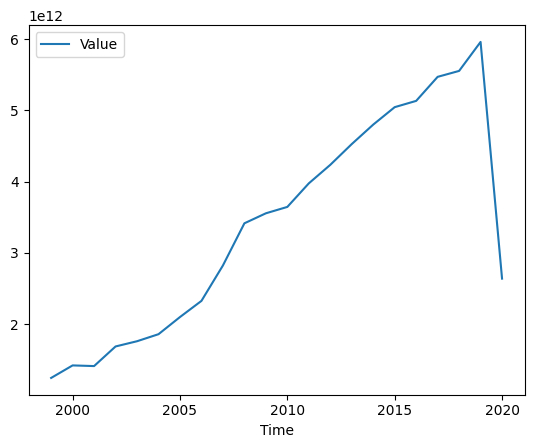

In [38]:
df2_line = df2RD[["Time", "Value"]].groupby("Time").sum("Value")
df2_line.plot()

In [39]:
def exptrend(country:str, group:str, columnlist:list, sumby:str):
    df = df2RD[(df2RD.Country == country) ]
    df_line = df[columnlist].groupby(group).sum(sumby)
    df_line.plot(label = country)

France
Germany
Italy
Japan
Korea
United Kingdom
United States
China (People's Republic of)


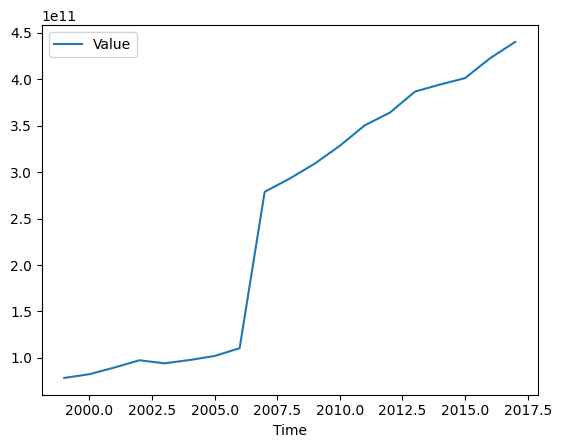

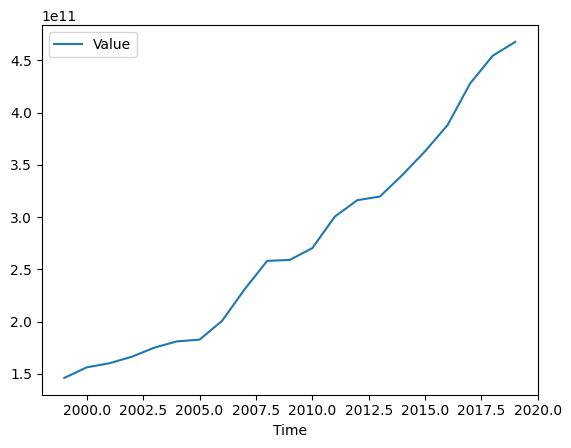

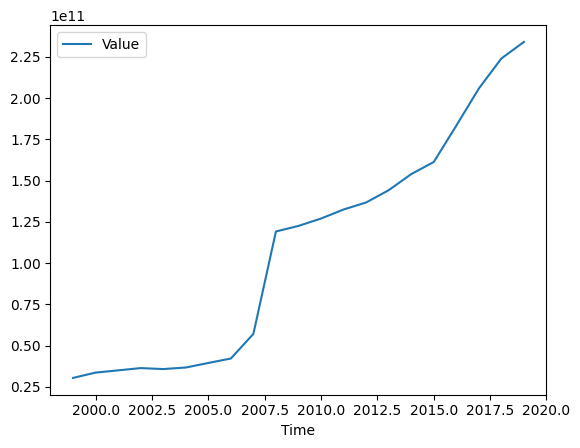

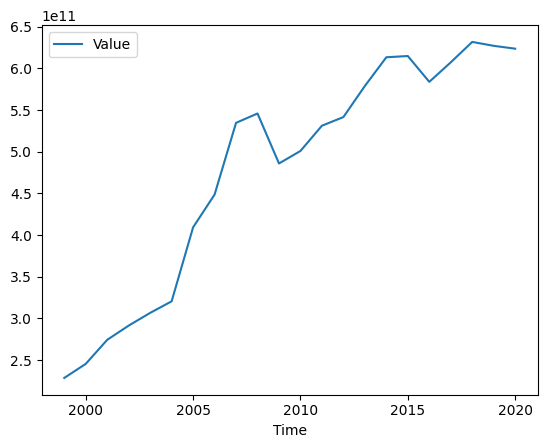

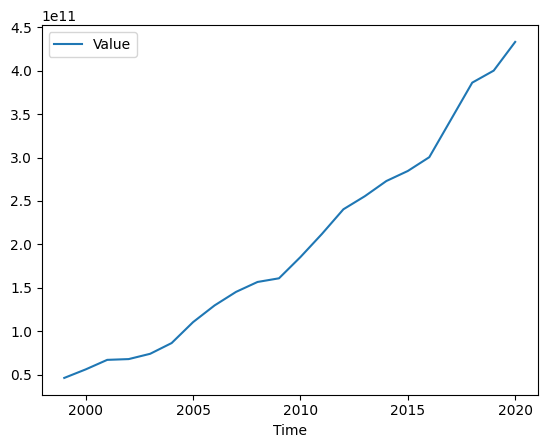

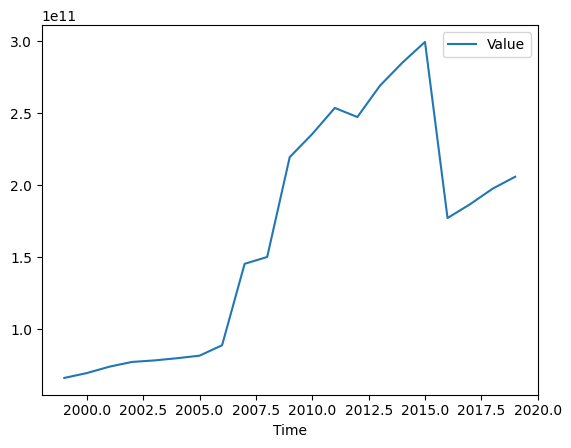

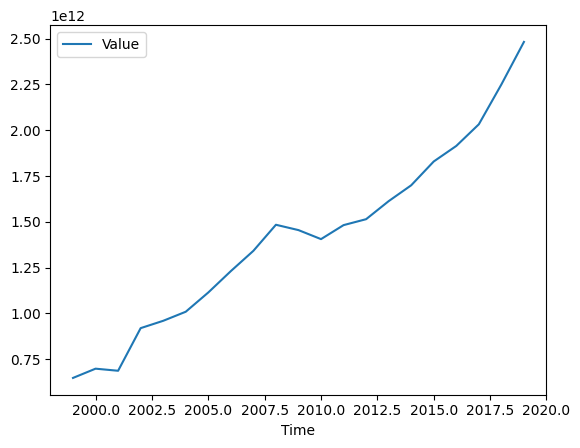

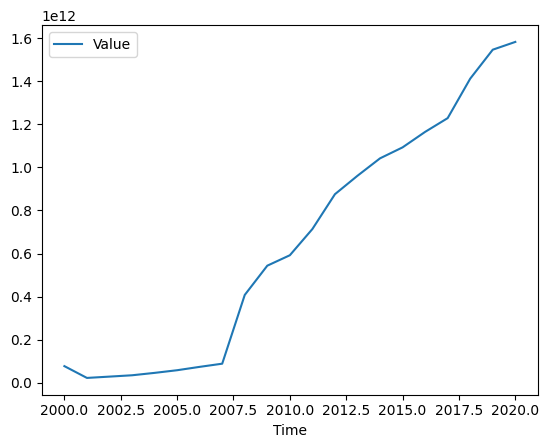

In [40]:
#line plot R&D expenditure for China, Germany, Japan, and US
for i in df2RD.Country.unique():
    exptrend(country=i, group="Time", columnlist=["Time","Value"], sumby="Value")
    print(i)

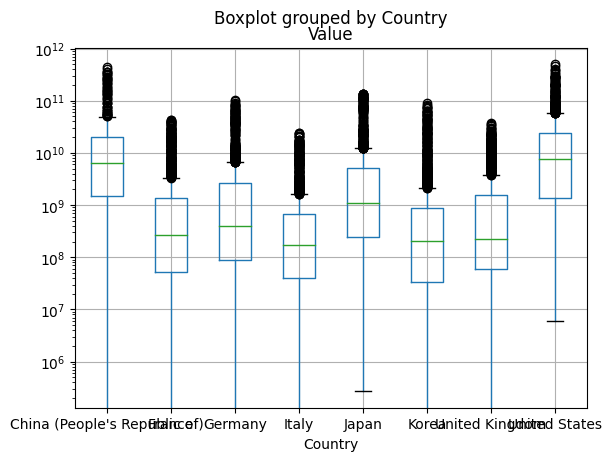

In [47]:
df2RD.boxplot(column = "Value", by='Country')
plt.semilogy();

In [49]:
Ch = df2RD.loc[df2RD["Country"].isin(["China (People's Republic of)"])]
US = df2RD.loc[df2RD["Country"].isin(["United States"])]
Ge = df2RD.loc[df2RD["Country"].isin(["Germany"])]
Jap = df2RD.loc[df2RD["Country"].isin(["Japan"])]
Fr = df2RD.loc[df2RD["Country"].isin(["France"])]
UK = df2RD.loc[df2RD["Country"].isin(["United Kingdom"])]
Kor = df2RD.loc[df2RD["Country"].isin(["Korea"])]
It = df2RD.loc[df2RD["Country"].isin(["Italy"])]

In [122]:
#linear regression Germany
#calculating annual R&D expenditure and then differences between years
Ge["R&D_Exp"] = Ge["Value"]
dfGEExp = Ge.groupby("Time").sum('Value').reset_index()
dfGEExp['DifExp'] = dfGEExp['R&D_Exp'].shift(1)
#calculating differences between years for Patent
dfGEPat = dfPatT.loc[dfPatT["Country"].isin(["Germany"])].reset_index()
dfGEPat.head()
dfGEPat['DifPat'] = dfGEPat['Value'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_10364\2782904077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ge["R&D_Exp"] = Ge["Value"]


In [123]:
#choosing same data type for merge column
dfGEPat["Time"]=dfGEPat["Time"].astype("int64")
dfGEExp["Time"]=dfGEExp["Time"].astype("int64")

#merging GDP and Exp data
mergedGEExpPat = dfGEPat.merge(dfGEExp, on="Time")

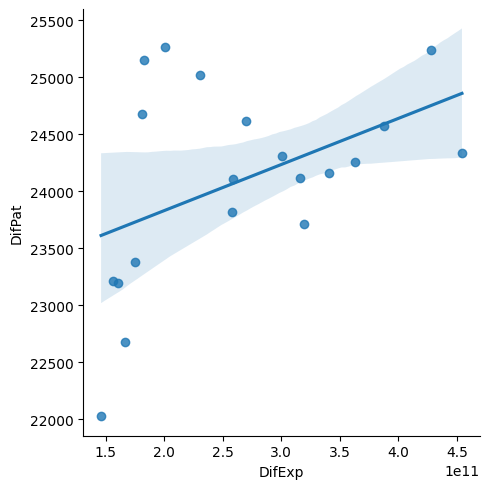

In [126]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="DifExp",y="DifPat", data=mergedGEExpPat)

In [128]:
indep = dfGEExp[["DifExp"]]
dep = dfGEPat[[ "DifPat"]]
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifPat   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              168.3
Date:                Sun, 05 Mar 2023   Prob (F-statistic):                    6.88e-11
Time:                        22:44:18   Log-Likelihood:                         -207.30
No. Observations:                  20   AIC:                                      416.6
Df Residuals:                      19   BIC:                                      417.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp      8.138e-08   6.27e-09     12.972      0.000    6.83e-08    9.45e-08
==============================================================================
Omnibus:                        2.361   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.307   Jarque-Bera (JB):                1.666
Skew:                          -0.515   Prob(JB):                        0.435
Kurtosis:                       2.031   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
#Pearson, Kendall, and Spearman correlation for Germany
S = []
for row in X.DifExp:
    S.append(row)
T = []
for row in y.DifPat:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=0.44639749121290895, pvalue=0.04849630054624871)

In [131]:
spearmanr(S,T)

SpearmanrResult(correlation=0.4676691729323308, pvalue=0.037588510204148884)

In [132]:
kendalltau(S,T)

KendalltauResult(correlation=0.3473684210526316, pvalue=0.033643947242160896)

In [133]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.061053
p-value: 0.998747
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730


In [271]:
#making data stationary
dfP_log=np.sqrt(dfGEPat['DifPat'])
dfP_diff=dfP_log.diff().dropna()
dfE_log=np.sqrt(dfGEExp['DifExp'])
dfE_diff=dfE_log.diff().dropna()

In [272]:
#re-running regression
indep = dfE_diff
dep = dfP_diff
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifPat   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.054
Method:                 Least Squares   F-statistic:                            0.07160
Date:                Mon, 06 Mar 2023   Prob (F-statistic):                       0.792
Time:                        00:05:38   Log-Likelihood:                         -37.240
No. Observations:                  18   AIC:                                      76.48
Df Residuals:                      17   BIC:                                      77.37
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp     -6.756e-06   2.52e-05     -0.268      0.792      -6e-05    4.65e-05
==============================================================================
Omnibus:                        0.261   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.878   Jarque-Bera (JB):                0.108
Skew:                          -0.159   Prob(JB):                        0.948
Kurtosis:                       2.793   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [273]:
#Pearson, Kendall, and Spearman correlation for Italy
S = []
for row in X:
    S.append(row)
T = []
for row in y:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=-0.28528241224929446, pvalue=0.2511730690176861)

In [274]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.851568
p-value: 0.002422
Critical Values:
	1%: -3.924
	5%: -3.068
	10%: -2.674


In [155]:
#linear regression China
#calculating annual R&D expenditure and then differences between years
Ch["R&D_Exp"] = Ch["Value"]
dfCHExp = Ch.groupby("Time").sum('Value').reset_index()
dfCHExp['DifExp'] = dfCHExp['R&D_Exp'].shift(1)
#calculating differences between years for Patent
dfCHPat = dfPatT.loc[dfPatT["Country"].isin(["China (People's Republic of)"])].reset_index()
dfCHPat['DifPat'] = dfCHPat['Value'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_10364\1694868681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ch["R&D_Exp"] = Ch["Value"]


In [156]:
#choosing same data type for merge column
dfCHPat["Time"]=dfCHPat["Time"].astype("int64")
dfCHExp["Time"]=dfCHExp["Time"].astype("int64")
#merging GDP and Exp data
mergedCHExpPat = dfCHPat.merge(dfCHExp, on="Time")

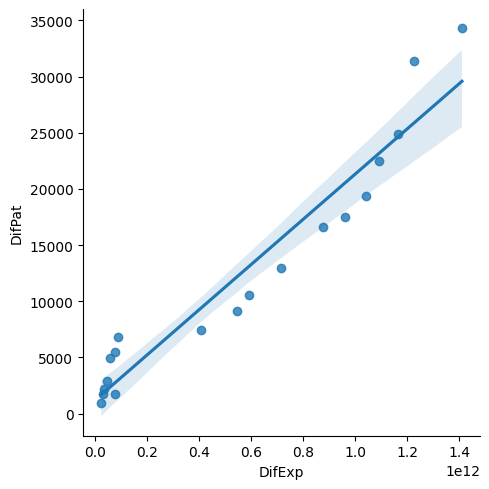

In [157]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="DifExp",y="DifPat", data=mergedCHExpPat)

In [158]:
indep = dfCHExp[["DifExp"]]
dep = dfCHPat[[ "DifPat"]]
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifPat   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              690.7
Date:                Sun, 05 Mar 2023   Prob (F-statistic):                    2.12e-16
Time:                        23:00:01   Log-Likelihood:                         -185.09
No. Observations:                  20   AIC:                                      372.2
Df Residuals:                      19   BIC:                                      373.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp      1.923e-08   7.32e-10     26.280      0.000    1.77e-08    2.08e-08
==============================================================================
Omnibus:                        1.975   Durbin-Watson:                   0.443
Prob(Omnibus):                  0.372   Jarque-Bera (JB):                1.110
Skew:                           0.205   Prob(JB):                        0.574
Kurtosis:                       1.921   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
#Pearson, Kendall, and Spearman correlation for China
S = []
for row in X.DifExp:
    S.append(row)
T = []
for row in y.DifPat:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=0.9683947410007185, pvalue=2.6646276756964437e-12)

In [160]:
spearmanr(S,T)

SpearmanrResult(correlation=0.9639097744360902, pvalue=8.65358685156247e-12)

In [161]:
kendalltau(S,T)

KendalltauResult(correlation=0.9157894736842106, pvalue=1.637252132068114e-12)

In [162]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.505722
p-value: 0.997545
Critical Values:
	1%: -3.833
	5%: -3.031
	10%: -2.656


In [267]:
#making data stationary
dfP_log=np.sqrt(dfCHPat['DifPat'])
dfP_diff=dfP_log.diff().dropna()
dfE_log=np.sqrt(dfCHExp['DifExp'])
dfE_diff=dfE_log.diff().dropna()

In [268]:
#re-running regression
indep = dfE_diff
dep = dfP_diff
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifPat   R-squared (uncentered):                   0.309
Model:                            OLS   Adj. R-squared (uncentered):              0.269
Method:                 Least Squares   F-statistic:                              7.612
Date:                Mon, 06 Mar 2023   Prob (F-statistic):                      0.0134
Time:                        00:04:02   Log-Likelihood:                         -63.864
No. Observations:                  18   AIC:                                      129.7
Df Residuals:                      17   BIC:                                      130.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp      5.972e-05   2.16e-05      2.759      0.013     1.4e-05       0.000
==============================================================================
Omnibus:                        4.427   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                2.436
Skew:                          -0.867   Prob(JB):                        0.296
Kurtosis:                       3.492   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [269]:
#Pearson, Kendall, and Spearman correlation for Italy
S = []
for row in X:
    S.append(row)
T = []
for row in y:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=0.10443474420840232, pvalue=0.6800456632388269)

In [270]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.593306
p-value: 0.005890
Critical Values:
	1%: -3.889
	5%: -3.054
	10%: -2.667


In [140]:
#linear regression US
#calculating annual R&D expenditure and then differences between years
US["R&D_Exp"] = US["Value"]
dfUSExp = US.groupby("Time").sum('Value').reset_index()
dfUSExp['DifExp'] = dfUSExp['R&D_Exp'].shift(1)
#calculating differences between years for Patent
dfUSPat = dfPatT.loc[dfPatT["Country"].isin(["United States"])].reset_index()
dfUSPat['DifPat'] = dfUSPat['Value'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_10364\129834373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US["R&D_Exp"] = US["Value"]


In [141]:
#choosing same data type for merge column
dfUSPat["Time"]=dfUSPat["Time"].astype("int64")
dfUSExp["Time"]=dfUSExp["Time"].astype("int64")

#merging GDP and Exp data
mergedUSExpPat = dfUSPat.merge(dfUSExp, on="Time")

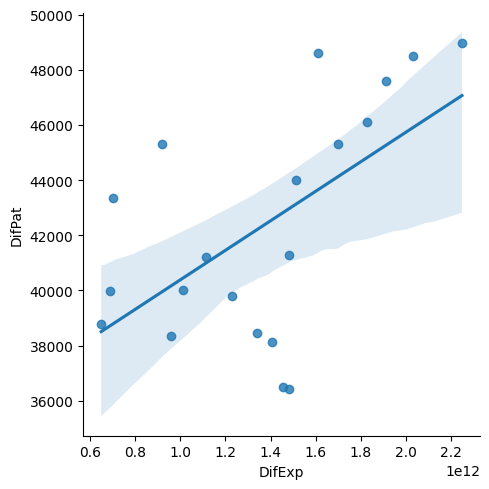

In [142]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="DifExp",y="DifPat", data=mergedUSExpPat)

In [150]:
indep = dfUSExp[["DifExp"]]
dep = dfUSPat[[ "DifPat"]]
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifPat   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                              246.9
Date:                Sun, 05 Mar 2023   Prob (F-statistic):                    2.42e-12
Time:                        22:58:46   Log-Likelihood:                         -215.15
No. Observations:                  20   AIC:                                      432.3
Df Residuals:                      19   BIC:                                      433.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp      2.855e-08   1.82e-09     15.714      0.000    2.48e-08    3.24e-08
==============================================================================
Omnibus:                        1.613   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.446   Jarque-Bera (JB):                1.225
Skew:                           0.396   Prob(JB):                        0.542
Kurtosis:                       2.082   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
#Pearson, Kendall, and Spearman correlation for US
S = []
for row in X.DifExp:
    S.append(row)
T = []
for row in y.DifPat:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=0.5814406679960049, pvalue=0.007167476059279179)

In [152]:
spearmanr(S,T)

SpearmanrResult(correlation=0.5684210526315789, pvalue=0.008922760369500673)

In [153]:
kendalltau(S,T)

KendalltauResult(correlation=0.38947368421052636, pvalue=0.016406081268886954)

In [154]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.722723
p-value: 0.990281
Critical Values:
	1%: -3.833
	5%: -3.031
	10%: -2.656


In [260]:
#making data stationary
dfP_log=np.sqrt(dfUSPat['DifPat'])
dfP_diff=dfP_log.diff().dropna()
dfE_log=np.sqrt(dfUSExp['DifExp'])
dfE_diff=dfE_log.diff().dropna()

In [261]:
#re-running regression
indep = dfE_diff
dep = dfP_diff
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifPat   R-squared (uncentered):                   0.074
Model:                            OLS   Adj. R-squared (uncentered):              0.020
Method:                 Least Squares   F-statistic:                              1.363
Date:                Mon, 06 Mar 2023   Prob (F-statistic):                       0.259
Time:                        00:01:26   Log-Likelihood:                         -60.262
No. Observations:                  18   AIC:                                      122.5
Df Residuals:                      17   BIC:                                      123.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp      3.917e-05   3.36e-05      1.168      0.259   -3.16e-05       0.000
==============================================================================
Omnibus:                        2.402   Durbin-Watson:                   2.262
Prob(Omnibus):                  0.301   Jarque-Bera (JB):                1.387
Skew:                          -0.680   Prob(JB):                        0.500
Kurtosis:                       2.996   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [263]:
#Pearson, Kendall, and Spearman correlation for Italy
S = []
for row in X:
    S.append(row)
T = []
for row in y:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=0.29531620238365264, pvalue=0.2341496664135891)

In [264]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.295541
p-value: 0.173410
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749


In [170]:
#linear regression Japan
#calculating annual R&D expenditure and then differences between years
Jap["R&D_Exp"] = Jap["Value"]
dfJapExp = Jap.groupby("Time").sum('Value').reset_index()
dfJapExp = dfJap[:-1]
dfJapExp['DifExp'] = dfJapExp['R&D_Exp'].shift(1)
#calculating differences between years for Patent
dfJapPat = dfPatT.loc[dfPatT["Country"].isin(["Japan"])].reset_index()
dfJapPat['DifPat'] = dfJapPat['Value'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_10364\3672388652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jap["R&D_Exp"] = Jap["Value"]


In [173]:
#choosing same data type for merge column
dfJapPat["Time"]=dfJapPat["Time"].astype("int64")
dfJapExp["Time"]=dfJapExp["Time"].astype("int64")

#merging GDP and Exp data
mergedJapExpPat = dfJapPat.merge(dfJapExp, on="Time")

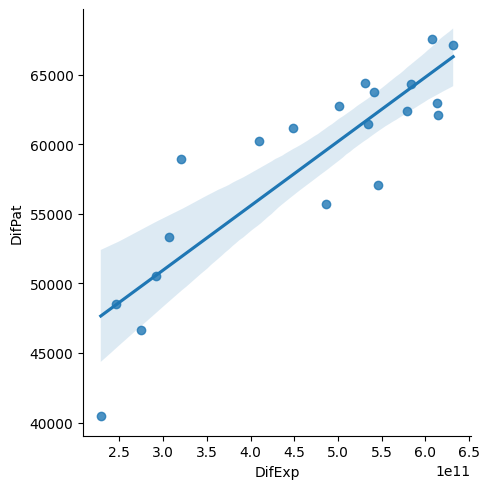

In [174]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="DifExp",y="DifPat", data=mergedJapExpPat)

In [175]:
indep = dfJapExp[["DifExp"]]
dep = dfJapPat[[ "DifPat"]]
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifPat   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              541.3
Date:                Sun, 05 Mar 2023   Prob (F-statistic):                    2.00e-15
Time:                        23:05:40   Log-Likelihood:                         -214.25
No. Observations:                  20   AIC:                                      430.5
Df Residuals:                      19   BIC:                                      431.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp      1.198e-07   5.15e-09     23.266      0.000    1.09e-07    1.31e-07
==============================================================================
Omnibus:                        6.043   Durbin-Watson:                   0.205
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                1.885
Skew:                           0.284   Prob(JB):                        0.390
Kurtosis:                       1.608   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
#Pearson, Kendall, and Spearman correlation for Japan
S = []
for row in X.DifExp:
    S.append(row)
T = []
for row in y.DifPat:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=0.8777527462222781, pvalue=3.6858145476842783e-07)

In [177]:
spearmanr(S,T)

SpearmanrResult(correlation=0.8345864661654135, pvalue=4.750605779025444e-06)

In [178]:
kendalltau(S,T)

KendalltauResult(correlation=0.6842105263157895, pvalue=5.104709679217094e-06)

In [179]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.854120
p-value: 0.002400
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


In [180]:
#linear regression Italy
#calculating annual R&D expenditure and then differences between years
It["R&D_Exp"] = It["Value"]
dfItExp = It.groupby("Time").sum('Value').reset_index()
#dfJapExp = dfJap[:-1]
dfItExp['DifExp'] = dfItExp['R&D_Exp'].shift(1)
#calculating differences between years for Patent
dfItPat = dfPatT.loc[dfPatT["Country"].isin(["Italy"])].reset_index()
dfItPat['DifPat'] = dfItPat['Value'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_10364\3237009423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  It["R&D_Exp"] = It["Value"]


In [184]:
#choosing same data type for merge column
dfItPat["Time"]=dfItPat["Time"].astype("int64")
dfItExp["Time"]=dfItExp["Time"].astype("int64")

#merging GDP and Exp data
mergedItExpPat = dfItPat.merge(dfItExp, on="Time")

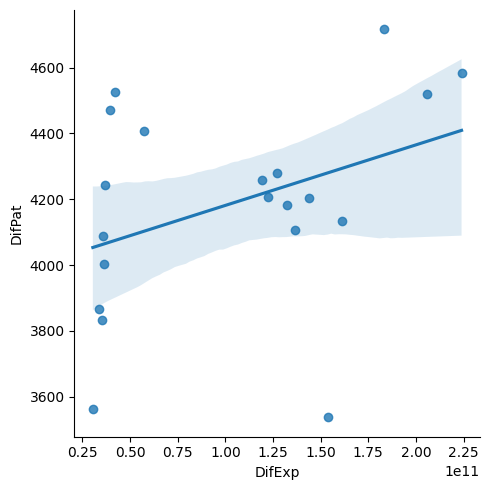

In [185]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="DifExp",y="DifPat", data=mergedItExpPat)

In [186]:
indep = dfItExp[["DifExp"]]
dep = dfItPat[[ "DifPat"]]
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifPat   R-squared (uncentered):                   0.746
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              55.70
Date:                Sun, 05 Mar 2023   Prob (F-statistic):                    4.63e-07
Time:                        23:15:28   Log-Likelihood:                         -181.54
No. Observations:                  20   AIC:                                      365.1
Df Residuals:                      19   BIC:                                      366.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp      3.001e-08   4.02e-09      7.463      0.000    2.16e-08    3.84e-08
==============================================================================
Omnibus:                        6.829   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                1.847
Skew:                          -0.188   Prob(JB):                        0.397
Kurtosis:                       1.559   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
#Pearson, Kendall, and Spearman correlation for Italy
S = []
for row in X.DifExp:
    S.append(row)
T = []
for row in y.DifPat:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=0.3783765362103698, pvalue=0.09996539566962673)

In [188]:
spearmanr(S,T)

SpearmanrResult(correlation=0.48872180451127817, pvalue=0.028772030054996085)

In [189]:
kendalltau(S,T)

KendalltauResult(correlation=0.3263157894736842, pvalue=0.04676893674989459)

In [190]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.144728
p-value: 0.944797
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730


In [252]:
#making data stationary
dfP_log=np.sqrt(dfItPat['DifPat'])
dfP_diff=dfP_log.diff().dropna()
dfE_log=np.sqrt(dfItExp['DifExp'])
dfE_diff=dfE_log.diff().dropna()

In [253]:
#re-running regression
indep = dfE_diff
dep = dfP_diff
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifPat   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.055
Method:                 Least Squares   F-statistic:                            0.05376
Date:                Sun, 05 Mar 2023   Prob (F-statistic):                       0.819
Time:                        23:57:13   Log-Likelihood:                         -39.411
No. Observations:                  18   AIC:                                      80.82
Df Residuals:                      17   BIC:                                      81.71
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp     -4.241e-06   1.83e-05     -0.232      0.819   -4.28e-05    3.44e-05
==============================================================================
Omnibus:                        4.275   Durbin-Watson:                   2.254
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                2.369
Skew:                          -0.168   Prob(JB):                        0.306
Kurtosis:                       4.745   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [254]:
#Pearson, Kendall, and Spearman correlation for UK
S = []
for row in X:
    S.append(row)
T = []
for row in y:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=-0.16568318530299553, pvalue=0.5111586221538684)

In [255]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -29.168817
p-value: 0.000000
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749


In [191]:
#linear regression UK
#calculating annual R&D expenditure and then differences between years
UK["R&D_Exp"] = UK["Value"]
dfUKExp = It.groupby("Time").sum('Value').reset_index()
#dfJapExp = dfJap[:-1]
dfUKExp['DifExp'] = dfUKExp['R&D_Exp'].shift(1)
#calculating differences between years for Patent
dfUKPat = dfPatT.loc[dfPatT["Country"].isin(["United Kingdom"])].reset_index()
dfUKPat['DifPat'] = dfUKPat['Value'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_10364\3043856668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK["R&D_Exp"] = UK["Value"]


In [192]:
#choosing same data type for merge column
dfUKPat["Time"]=dfUKPat["Time"].astype("int64")
dfUKExp["Time"]=dfUKExp["Time"].astype("int64")

#merging GDP and Exp data
mergedUKExpPat = dfUKPat.merge(dfUKExp, on="Time")

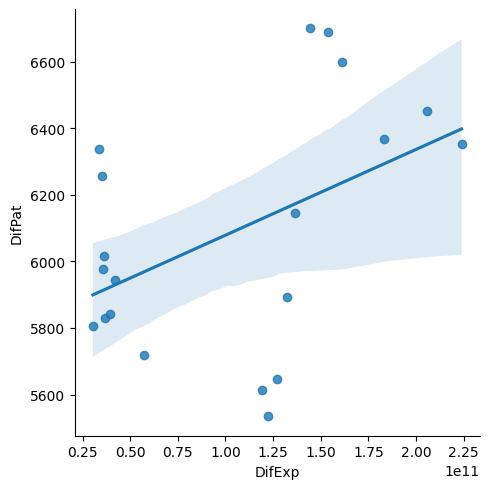

In [193]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="DifExp",y="DifPat", data=mergedUKExpPat)

In [194]:
indep = dfUKExp[["DifExp"]]
dep = dfUKPat[[ "DifPat"]]
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifPat   R-squared (uncentered):                   0.746
Model:                            OLS   Adj. R-squared (uncentered):              0.733
Method:                 Least Squares   F-statistic:                              55.87
Date:                Sun, 05 Mar 2023   Prob (F-statistic):                    4.53e-07
Time:                        23:18:43   Log-Likelihood:                         -188.97
No. Observations:                  20   AIC:                                      379.9
Df Residuals:                      19   BIC:                                      380.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp      4.359e-08   5.83e-09      7.475      0.000    3.14e-08    5.58e-08
==============================================================================
Omnibus:                        4.134   Durbin-Watson:                   0.066
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                1.510
Skew:                          -0.193   Prob(JB):                        0.470
Kurtosis:                       1.710   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
#Pearson, Kendall, and Spearman correlation for UK
S = []
for row in X.DifExp:
    S.append(row)
T = []
for row in y.DifPat:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=0.46038534776262185, pvalue=0.04108391592358097)

In [196]:
spearmanr(S,T)

SpearmanrResult(correlation=0.47368421052631576, pvalue=0.034879991379496524)

In [197]:
kendalltau(S,T)

KendalltauResult(correlation=0.22105263157894736, pvalue=0.18588304288709082)

In [198]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.144728
p-value: 0.944797
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730


In [248]:
#making data stationary
dfP_log=np.sqrt(dfUKPat['DifPat'])
dfP_diff=dfP_log.diff().dropna()
dfE_log=np.sqrt(dfUKExp['DifExp'])
dfE_diff=dfE_log.diff().dropna()

In [249]:
#re-running regression
indep = dfE_diff
dep = dfP_diff
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifPat   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):             -0.027
Method:                 Least Squares   F-statistic:                             0.5339
Date:                Sun, 05 Mar 2023   Prob (F-statistic):                       0.475
Time:                        23:55:41   Log-Likelihood:                         -29.219
No. Observations:                  18   AIC:                                      60.44
Df Residuals:                      17   BIC:                                      61.33
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp     -7.587e-06   1.04e-05     -0.731      0.475   -2.95e-05    1.43e-05
==============================================================================
Omnibus:                        7.523   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                4.660
Skew:                           1.114   Prob(JB):                       0.0973
Kurtosis:                       4.116   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [250]:
#Pearson, Kendall, and Spearman correlation for UK
S = []
for row in X:
    S.append(row)
T = []
for row in y:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=-0.2143382546965904, pvalue=0.3930680467221477)

In [251]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -29.168817
p-value: 0.000000
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749


In [205]:
#linear regression Korea
#calculating annual R&D expenditure and then differences between years
Kor["R&D_Exp"] = Kor["Value"]
dfKorExp = Kor.groupby("Time").sum('Value').reset_index()
dfKorExp = dfKorExp[:-1]
dfKorExp['DifExp'] = dfKorExp['R&D_Exp'].shift(1)
#calculating differences between years for Patent
dfKorPat = dfPatT.loc[dfPatT["Country"].isin(["Korea"])].reset_index()
dfKorPat['DifPat'] = dfKorPat['Value'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_10364\1010261649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kor["R&D_Exp"] = Kor["Value"]


In [206]:
#choosing same data type for merge column
dfKorPat["Time"]=dfKorPat["Time"].astype("int64")
dfKorExp["Time"]=dfKorExp["Time"].astype("int64")

#merging GDP and Exp data
mergedKorExpPat = dfKorPat.merge(dfKorExp, on="Time")

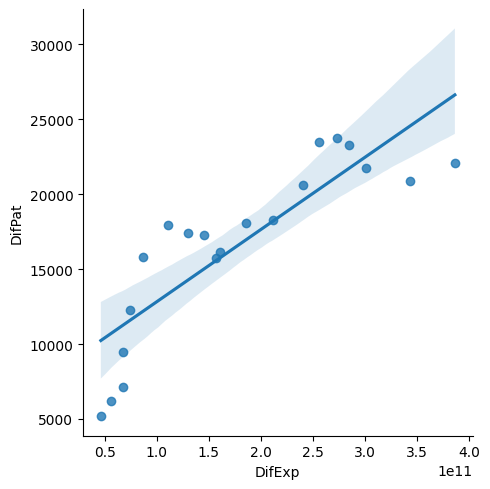

In [207]:
sns.lmplot(x="DifExp",y="DifPat", data=mergedKorExpPat)

In [208]:
indep = dfKorExp[["DifExp"]]
dep = dfKorPat[[ "DifPat"]]
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifPat   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              225.8
Date:                Sun, 05 Mar 2023   Prob (F-statistic):                    5.33e-12
Time:                        23:24:48   Log-Likelihood:                         -198.31
No. Observations:                  20   AIC:                                      398.6
Df Residuals:                      19   BIC:                                      399.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp      8.224e-08   5.47e-09     15.027      0.000    7.08e-08    9.37e-08
==============================================================================
Omnibus:                        5.296   Durbin-Watson:                   0.151
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                3.051
Skew:                          -0.865   Prob(JB):                        0.218
Kurtosis:                       3.816   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
#Pearson, Kendall, and Spearman correlation for Korea
S = []
for row in X.DifExp:
    S.append(row)
T = []
for row in y.DifPat:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=0.8546356641180939, pvalue=1.6041108122757796e-06)

In [210]:
spearmanr(S,T)

SpearmanrResult(correlation=0.918796992481203, pvalue=1.0827727759514947e-08)

In [211]:
kendalltau(S,T)

KendalltauResult(correlation=0.768421052631579, pvalue=1.0352946382857873e-07)

In [212]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.037617
p-value: 0.994647
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730


In [243]:
#making data stationary
dfP_log=np.sqrt(dfKorPat['DifPat'])
dfP_diff=dfP_log.diff().dropna()
dfE_log=np.sqrt(dfKorExp['DifExp'])
dfE_diff=dfE_log.diff().dropna()

In [244]:
#re-running regression
indep = dfE_diff
dep = dfP_diff
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifPat   R-squared (uncentered):                   0.191
Model:                            OLS   Adj. R-squared (uncentered):              0.143
Method:                 Least Squares   F-statistic:                              4.012
Date:                Sun, 05 Mar 2023   Prob (F-statistic):                      0.0614
Time:                        23:53:19   Log-Likelihood:                         -59.695
No. Observations:                  18   AIC:                                      121.4
Df Residuals:                      17   BIC:                                      122.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp         0.0001   6.78e-05      2.003      0.061   -7.25e-06       0.000
==============================================================================
Omnibus:                        1.341   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.511   Jarque-Bera (JB):                1.082
Skew:                           0.399   Prob(JB):                        0.582
Kurtosis:                       2.103   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
#Pearson, Kendall, and Spearman correlation for Korea
S = []
for row in X:
    S.append(row)
T = []
for row in y:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=-0.08773880611065218, pvalue=0.7292006822682414)

In [247]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.034512
p-value: 0.740470
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749


In [222]:
#linear regression France
#calculating annual R&D expenditure and then differences between years
Fr["R&D_Exp"] = Fr["Value"]
dfFrExp = Fr.groupby("Time").sum('Value').reset_index()
#dfFrExp = dfFrExp[:-1]
dfFrExp['DifExp'] = dfFrExp['R&D_Exp'].shift(1)
#calculating differences between years for Patent
dfFrPat = dfPatT.loc[dfPatT["Country"].isin(["France"])].reset_index()
dfFrPat = dfFrPat[:-2]
dfFrPat['DifPat'] = dfFrPat['Value'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_10364\631230444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fr["R&D_Exp"] = Fr["Value"]


In [225]:
#choosing same data type for merge column
dfFrPat["Time"]=dfFrPat["Time"].astype("int64")
dfFrExp["Time"]=dfFrExp["Time"].astype("int64")

#merging GDP and Exp data
mergedFrExpPat = dfFrPat.merge(dfFrExp, on="Time")

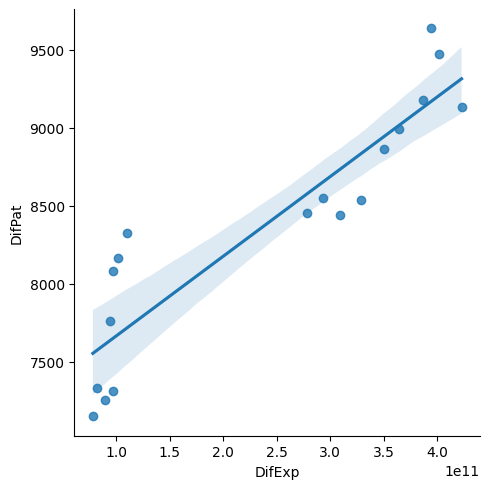

In [226]:
sns.lmplot(x="DifExp",y="DifPat", data=mergedFrExpPat)

In [228]:
indep = dfFrExp[["DifExp"]]
dep = dfFrPat[[ "DifPat"]]
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifPat   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.815
Method:                 Least Squares   F-statistic:                              80.18
Date:                Sun, 05 Mar 2023   Prob (F-statistic):                    7.62e-08
Time:                        23:33:58   Log-Likelihood:                         -172.50
No. Observations:                  18   AIC:                                      347.0
Df Residuals:                      17   BIC:                                      347.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp      2.799e-08   3.13e-09      8.954      0.000    2.14e-08    3.46e-08
==============================================================================
Omnibus:                       17.948   Durbin-Watson:                   0.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                2.416
Skew:                           0.072   Prob(JB):                        0.299
Kurtosis:                       1.211   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [229]:
#Pearson, Kendall, and Spearman correlation for France
S = []
for row in X.DifExp:
    S.append(row)
T = []
for row in y.DifPat:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=0.9068586569423221, pvalue=2.119179504447235e-07)

In [230]:
spearmanr(S,T)

SpearmanrResult(correlation=0.9649122807017543, pvalue=1.0347287642285863e-10)

In [231]:
kendalltau(S,T)

KendalltauResult(correlation=0.8692810457516341, pvalue=2.158258582693712e-09)

In [232]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.749028
p-value: 0.833638
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


In [235]:
#making data stationary
dfP_log=np.sqrt(dfFrPat['DifPat'])
dfP_diff=dfP_log.diff().dropna()
dfE_log=np.sqrt(dfFrExp['DifExp'])
dfE_diff=dfE_log.diff().dropna()

In [238]:
#re-running regression
indep = dfE_diff
dep = dfP_diff
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifPat   R-squared (uncentered):                   0.034
Model:                            OLS   Adj. R-squared (uncentered):             -0.030
Method:                 Least Squares   F-statistic:                             0.5326
Date:                Sun, 05 Mar 2023   Prob (F-statistic):                       0.477
Time:                        23:45:55   Log-Likelihood:                         -26.458
No. Observations:                  16   AIC:                                      54.92
Df Residuals:                      15   BIC:                                      55.69
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp      4.719e-06   6.47e-06      0.730      0.477   -9.06e-06    1.85e-05
==============================================================================
Omnibus:                        0.004   Durbin-Watson:                   1.120
Prob(Omnibus):                  0.998   Jarque-Bera (JB):                0.145
Skew:                           0.005   Prob(JB):                        0.930
Kurtosis:                       2.534   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
#Pearson, Kendall, and Spearman correlation for France
S = []
for row in X:
    S.append(row)
T = []
for row in y:
    T.append(row)
pearsonr(S,T)

PearsonRResult(statistic=-0.04135776319860816, pvalue=0.8791273624799519)

In [242]:
#ADF test
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.763977
p-value: 0.003298
Critical Values:
	1%: -3.964
	5%: -3.085
	10%: -2.682
